In [107]:
import matplotlib.pyplot as plt
import gensim
import numpy as np
import spacy

from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import os, re, operator, warnings
warnings.filterwarnings('ignore')  # Let's not pay heed to them right now
%matplotlib inline

In [108]:
def clean(text):
    return ''.join([i if ord(i) < 128 else ' ' for i in text])

test_data_dir = '{}'.format(os.sep).join([gensim.__path__[0], 'test', 'test_data'])
lee_train_file = test_data_dir + os.sep + 'lee_background.cor'
text = open(lee_train_file).read()

In [109]:
nlp = spacy.load('en')

In [110]:
my_stop_words = ['say', '\'s', 'Mr', 'be', 'said', 'says', 'saying']
for stopword in my_stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True

In [111]:
doc = nlp(clean(text))

In [33]:
type(doc)

spacy.tokens.doc.Doc

In [115]:
# we add some words to the stop word list
texts, article, skl_texts = [], [], []
for w in doc:
    # if it's not a stop word or punctuation mark, add it to our article!
    if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num:
        # we add the lematized version of the word
        article.append(w.lemma_)
    # if it's a new line, it means we're onto our next document
    if w.text == '\n':
        skl_texts.append(' '.join(article))
        texts.append(article)
        article = []

In [116]:
for i in range(10):
    print(" ".join(texts[i]))

hundred people force vacate home southern highlands new south wales strong wind today push huge bushfire town hill top a new blaze near goulburn south west sydney force closure hume highway at 4:00pm aedt marked deterioration weather storm cell move east blue mountains force authority decision evacuate people home outlying street hill top new south wales southern highland an estimate resident leave home nearby mittagong the new south wales rural fire service weather condition cause fire burn finger formation ease fire unit hill top optimistic defend property as blaze burn new year eve new south wales fire crew call new fire gunning south goulburn while detail available stage fire authority close hume highway direction meanwhile new fire sydney west longer threaten property cranebrook area rain fall part illawarra sydney hunter valley north coast but bureau meteorology claire richards rain little ease fire burn state the fall isolate area generally fall millimetre in place significant m

# Creating Bigrams

In [117]:
bigram = gensim.models.Phrases(texts)

2018-12-10 16:11:55,316 : INFO : collecting all words and their counts
2018-12-10 16:11:55,320 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2018-12-10 16:11:55,648 : INFO : collected 31194 word types from a corpus of 32405 words (unigram + bigrams) and 299 sentences
2018-12-10 16:11:55,673 : INFO : using 31194 counts as vocab in Phrases<0 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>


In [118]:
texts = [bigram[line] for line in texts]

In [119]:
texts[1][0:10]

['indian',
 'security_force',
 'shoot_dead',
 'suspect',
 'militant',
 'night',
 'long',
 'encounter',
 'southern',
 'kashmir']

In [120]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

2018-12-10 16:12:00,073 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-12-10 16:12:00,160 : INFO : built Dictionary(5661 unique tokens: ['4:00pm', 'a', 'aedt', 'an', 'area']...) from 299 documents (total 30718 corpus positions)


In [121]:
corpus[1][0:10]

[(83, 1),
 (94, 1),
 (95, 1),
 (102, 2),
 (118, 3),
 (119, 1),
 (120, 2),
 (121, 2),
 (122, 1),
 (123, 1)]

# Latent Dirichlet allocation - LDA model

In [22]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

2018-12-10 14:50:35,940 : INFO : using symmetric alpha at 0.1
2018-12-10 14:50:35,956 : INFO : using symmetric eta at 0.1
2018-12-10 14:50:35,963 : INFO : using serial LDA version on this node
2018-12-10 14:50:35,993 : INFO : running online (single-pass) LDA training, 10 topics, 1 passes over the supplied corpus of 299 documents, updating model once every 299 documents, evaluating perplexity every 299 documents, iterating 50x with a convergence threshold of 0.001000
2018-12-10 14:50:35,995 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2018-12-10 14:50:36,686 : INFO : -11.343 per-word bound, 2597.8 perplexity estimate based on a held-out corpus of 299 documents with 30718 words
2018-12-10 14:50:36,687 : INFO : PROGRESS: pass 0, at document #299/299
2018-12-10 14:50:36,996 : INFO : topic #1 (0.100): 0.013*"-PRON-" + 0.012*"the" + 0.005*"israeli" + 0.005*"people" + 0.004*"day" + 0.004*"arrest" + 0.003*"

In [23]:
ldamodel.show_topics()

[(0,
  '0.018*"-PRON-" + 0.009*"the" + 0.008*"australian" + 0.005*"australia" + 0.004*"arafat" + 0.004*"attack" + 0.004*"police" + 0.004*"year" + 0.003*"israeli" + 0.003*"palestinian"'),
 (1,
  '0.013*"-PRON-" + 0.012*"the" + 0.005*"israeli" + 0.005*"people" + 0.004*"day" + 0.004*"arrest" + 0.003*"tell" + 0.003*"australian" + 0.003*"child" + 0.003*"good"'),
 (2,
  '0.015*"the" + 0.012*"-PRON-" + 0.005*"year" + 0.004*"company" + 0.003*"attack" + 0.003*"a" + 0.003*"tell" + 0.003*"group" + 0.003*"australia" + 0.003*"cent"'),
 (3,
  '0.012*"the" + 0.009*"-PRON-" + 0.006*"australia" + 0.004*"australian" + 0.004*"qantas" + 0.004*"day" + 0.004*"company" + 0.004*"tell" + 0.004*"a" + 0.004*"people"'),
 (4,
  '0.011*"the" + 0.009*"-PRON-" + 0.007*"government" + 0.006*"people" + 0.006*"us" + 0.006*"palestinian" + 0.004*"fire" + 0.004*"israeli" + 0.004*"year" + 0.003*"afghanistan"'),
 (5,
  '0.022*"the" + 0.011*"-PRON-" + 0.004*"force" + 0.004*"australian" + 0.004*"kill" + 0.004*"government" + 0.0

In [58]:
ldamodel[corpus[0]]

[(8, 0.9944775)]

# Latent semantic indexing - LSI Model

In [35]:
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

2018-12-10 15:00:58,297 : INFO : using serial LSI version on this node
2018-12-10 15:00:58,341 : INFO : updating model with new documents
2018-12-10 15:00:58,408 : INFO : preparing a new chunk of documents
2018-12-10 15:00:58,498 : INFO : using 100 extra samples and 2 power iterations
2018-12-10 15:00:58,503 : INFO : 1st phase: constructing (5661, 110) action matrix
2018-12-10 15:00:58,666 : INFO : orthonormalizing (5661, 110) action matrix
2018-12-10 15:00:59,071 : INFO : 2nd phase: running dense svd on (110, 299) matrix
2018-12-10 15:00:59,151 : INFO : computing the final decomposition
2018-12-10 15:00:59,156 : INFO : keeping 10 factors (discarding 63.602% of energy spectrum)
2018-12-10 15:00:59,169 : INFO : processed documents up to #299
2018-12-10 15:00:59,182 : INFO : topic #0(74.073): 0.513*"the" + 0.364*"-PRON-" + 0.132*"force" + 0.124*"israeli" + 0.117*"palestinian" + 0.113*"people" + 0.112*"australian" + 0.111*"arafat" + 0.110*"us" + 0.110*"government"
2018-12-10 15:00:59,189 

In [38]:
lsimodel.show_topics()

[(0,
  '0.513*"the" + 0.364*"-PRON-" + 0.132*"force" + 0.124*"israeli" + 0.117*"palestinian" + 0.113*"people" + 0.112*"australian" + 0.111*"arafat" + 0.110*"us" + 0.110*"government"'),
 (1,
  '-0.366*"palestinian" + -0.352*"israeli" + -0.337*"arafat" + 0.222*"-PRON-" + -0.180*"israel" + -0.156*"official" + -0.156*"sharon" + -0.152*"hamas" + -0.142*"west_bank" + -0.128*"kill"'),
 (2,
  '0.310*"the" + -0.247*"afghanistan" + -0.227*"force" + -0.227*"us" + -0.201*"-PRON-" + -0.197*"al_qaeda" + -0.185*"bin_laden" + 0.172*"fire" + -0.150*"pakistan" + -0.133*"tora_bora"'),
 (3,
  '0.470*"-PRON-" + -0.253*"the" + 0.202*"win" + -0.190*"force" + 0.155*"good" + -0.155*"fire" + -0.155*"afghanistan" + 0.140*"test" + -0.133*"area" + 0.125*"metre"'),
 (4,
  '0.331*"fire" + -0.316*"the" + 0.261*"area" + 0.211*"sydney" + -0.159*"company" + 0.158*"firefighter" + 0.156*"south" + -0.149*"australian" + 0.142*"wind" + 0.140*"new_south"'),
 (5,
  '-0.305*"-PRON-" + 0.236*"australia" + 0.225*"test" + 0.189*"d

# Hierarchical Dirichlet process - HDP Model

In [39]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)

2018-12-10 15:03:37,442 : INFO : (0, '0.008*-PRON- + 0.004*us + 0.004*taliban + 0.003*the + 0.003*airport + 0.003*people + 0.003*force + 0.003*afghanistan + 0.003*kandahar + 0.002*hit')
2018-12-10 15:03:37,454 : INFO : (1, '0.008*the + 0.004*government + 0.003*-PRON- + 0.003*australian + 0.003*report + 0.002*agreement + 0.002*afghanistan + 0.002*company + 0.002*year + 0.002*call')
2018-12-10 15:03:37,466 : INFO : (2, '0.006*israeli + 0.005*palestinian + 0.005*the + 0.005*arafat + 0.004*sharon + 0.004*government + 0.004*group + 0.003*choose + 0.003*official + 0.003*terrorism')
2018-12-10 15:03:37,478 : INFO : (3, '0.003*director + 0.003*-PRON- + 0.003*friedli + 0.003*the + 0.002*job + 0.002*know + 0.002*reply + 0.002*cent + 0.002*company + 0.002*end')
2018-12-10 15:03:37,491 : INFO : (4, '0.003*match + 0.002*israeli + 0.002*the + 0.002*rafter + 0.002*play + 0.002*ask + 0.002*team + 0.002*guarantee + 0.002*tennis + 0.002*disappointed')
2018-12-10 15:03:37,503 : INFO : (5, '0.003*arrest +

In [40]:
hdpmodel.show_topics()

[(0,
  '0.008*-PRON- + 0.004*us + 0.004*taliban + 0.003*the + 0.003*airport + 0.003*people + 0.003*force + 0.003*afghanistan + 0.003*kandahar + 0.002*hit + 0.002*damage + 0.002*powell + 0.002*kill + 0.002*southern + 0.002*osama_bin + 0.002*state + 0.002*president + 0.002*city + 0.002*storm + 0.002*laden'),
 (1,
  '0.008*the + 0.004*government + 0.003*-PRON- + 0.003*australian + 0.003*report + 0.002*agreement + 0.002*afghanistan + 0.002*company + 0.002*year + 0.002*call + 0.002*time + 0.002*month + 0.002*afghan + 0.002*day + 0.002*qantas + 0.002*bid + 0.002*a + 0.002*state + 0.002*go + 0.002*troop'),
 (2,
  '0.006*israeli + 0.005*palestinian + 0.005*the + 0.005*arafat + 0.004*sharon + 0.004*government + 0.004*group + 0.003*choose + 0.003*official + 0.003*terrorism + 0.003*kill + 0.003*west_bank + 0.002*militant + 0.002*gaza_strip + 0.002*security + 0.002*target + 0.002*attack + 0.002*hamas + 0.002*israel + 0.002*air_strike'),
 (3,
  '0.003*director + 0.003*-PRON- + 0.003*friedli + 0.003

# Topic Modelling with scikit-learn

In [41]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [42]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

2018-12-10 15:13:07,435 : INFO : Downloading 20news dataset. This may take a few minutes.
2018-12-10 15:13:07,451 : INFO : Downloading dataset from https://ndownloader.figshare.com/files/5975967 (14 MB)


In [49]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [52]:
num_topics = 10
num_top_words = 10
num_features = 1000

In [45]:
# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=num_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(skl_texts)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [47]:
nmf = NMF(n_components=num_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

In [53]:
display_topics(nmf, tfidf_feature_names, num_top_words)

Topic 0:
pron government australia australian year man people new minister india
Topic 1:
palestinian arafat israeli israel hamas gaza attack suicide sharon militant
Topic 2:
bin laden afghanistan qaeda al bora tora force taliban afghan
Topic 3:
qantas worker union industrial maintenance wage dispute freeze action relations
Topic 4:
test south africa match waugh day bowler wicket cricket lee
Topic 5:
south sydney wind firefighter line area yacht wales storm new
Topic 6:
river guide adventure canyon court trip australians interlaken swiss accident
Topic 7:
hollingworth dr governor abuse general anglican child school allegation statement
Topic 8:
rate bank cut economy reserve cent growth economic market recession
Topic 9:
commission hih royal collapse hearing company union report martin evidence


In [55]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=num_features, stop_words='english')
tf = tf_vectorizer.fit_transform(skl_texts)
tf_feature_names = tf_vectorizer.get_feature_names()

In [56]:
lda = LatentDirichletAllocation(n_topics=num_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)


In [57]:
display_topics(lda, tf_feature_names, num_top_words)

Topic 0:
official israel smoke flame palestinian hamas building damage inside attack
Topic 1:
test south day australia match lee africa wicket pron waugh
Topic 2:
pron people world think child river day good australia metre
Topic 3:
ice pron police inside people vaughan rise level sea child
Topic 4:
club south sydney melbourne area pron property wind great today
Topic 5:
pron palestinian government attack israeli force arafat australia afghanistan people
Topic 6:
commission company report royal hih collapse australian pron tell director
Topic 7:
company union qantas worker industrial pay maintenance dispute cent action
Topic 8:
new south year pron sydney storm area wales state australian
Topic 9:
road highway debt reduce prisoner close illawarra hospital action use


In [89]:
texts = [['bank','river','shore','water'],
['river','water','flow','fast','tree'],
['bank','water','fall','flow'],
['bank','bank','water','rain','river'],
['river','water','mud','tree'],
['money','transaction','bank','finance'],
['bank','borrow','money'],
['bank', 'finance'],
['finance', 'money', 'sell', 'bank'],
['borrow','sell'],
['bank','loan','sell']]

In [90]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

2018-12-10 16:02:11,975 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-12-10 16:02:11,979 : INFO : built Dictionary(16 unique tokens: ['bank', 'river', 'shore', 'water', 'fast']...) from 11 documents (total 40 corpus positions)


In [91]:
dummy_model = LdaModel(corpus=corpus, num_topics=2, id2word=dictionary)

2018-12-10 16:02:12,972 : INFO : using symmetric alpha at 0.5
2018-12-10 16:02:12,978 : INFO : using symmetric eta at 0.5
2018-12-10 16:02:12,979 : INFO : using serial LDA version on this node
2018-12-10 16:02:12,982 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 11 documents, updating model once every 11 documents, evaluating perplexity every 11 documents, iterating 50x with a convergence threshold of 0.001000
2018-12-10 16:02:12,986 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2018-12-10 16:02:13,008 : INFO : -3.572 per-word bound, 11.9 perplexity estimate based on a held-out corpus of 11 documents with 40 words
2018-12-10 16:02:13,011 : INFO : PROGRESS: pass 0, at document #11/11
2018-12-10 16:02:13,022 : INFO : topic #0 (0.500): 0.191*"bank" + 0.132*"finance" + 0.127*"money" + 0.085*"sell" + 0.074*"borrow" + 0.060*"transaction" + 0.048*"water" 

In [92]:
dummy_model.show_topics()

[(0,
  '0.191*"bank" + 0.132*"finance" + 0.127*"money" + 0.085*"sell" + 0.074*"borrow" + 0.060*"transaction" + 0.048*"water" + 0.042*"river" + 0.037*"flow" + 0.033*"loan"'),
 (1,
  '0.170*"bank" + 0.149*"water" + 0.123*"river" + 0.069*"tree" + 0.065*"flow" + 0.062*"sell" + 0.043*"shore" + 0.042*"fast" + 0.042*"rain" + 0.041*"fall"')]

In [93]:
dummy_model.get_term_topics('water')

[(0, 0.029276578), (1, 0.13637443)]

In [94]:
dummy_model.get_term_topics('finance')

[(0, 0.11370327), (1, 0.015358636)]

In [95]:
dummy_model.get_term_topics('bank')

[(0, 0.17326507), (1, 0.15740158)]

In [96]:
bow_water = ['bank','water','bank']
bow_finance = ['bank','finance','bank']

In [97]:
bow = dummy_model.id2word.doc2bow(bow_water) # convert to bag of words format first
doc_topics, word_topics, phi_values = dummy_model.get_document_topics(bow, per_word_topics=True) 

In [98]:
word_topics

[(0, [1, 0]), (3, [1, 0])]

In [99]:
doc_topics

[(0, 0.19781494), (1, 0.80218506)]

In [75]:
dummy_model.id2word.token2id

{'bank': 0,
 'river': 1,
 'shore': 2,
 'water': 3,
 'fast': 4,
 'flow': 5,
 'tree': 6,
 'fall': 7,
 'rain': 8,
 'mud': 9,
 'finance': 10,
 'money': 11,
 'transaction': 12,
 'borrow': 13,
 'sell': 14,
 'loan': 15}

In [100]:
phi_values

[(0, [(0, 0.26219475), (1, 1.7378051)]),
 (3, [(0, 0.028583394), (1, 0.97141653)])]

In [101]:
bow = dummy_model.id2word.doc2bow(bow_finance) # convert to bag of words format first
doc_topics, word_topics, phi_values = dummy_model.get_document_topics(bow, per_word_topics=True) 

In [102]:
word_topics

[(0, [0, 1]), (10, [0, 1])]

In [103]:
doc_topics

[(0, 0.83138365), (1, 0.16861637)]

In [104]:
phi_values

[(0, [(0, 1.8388255), (1, 0.1611747)]),
 (10, [(0, 0.9871349), (1, 0.012865138)])]

# Topic coherence and evaluating topic models

In [105]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [122]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=10).get_coherence()

2018-12-10 16:12:16,441 : INFO : using WordOccurrenceAccumulator to estimate probabilities from sliding windows
2018-12-10 16:12:16,507 : INFO : WordOccurrenceAccumulator accumulated stats from 1000 documents
2018-12-10 16:12:16,552 : INFO : WordOccurrenceAccumulator accumulated stats from 2000 documents
2018-12-10 16:12:16,616 : INFO : WordOccurrenceAccumulator accumulated stats from 3000 documents
2018-12-10 16:12:16,647 : INFO : WordOccurrenceAccumulator accumulated stats from 4000 documents
2018-12-10 16:12:16,700 : INFO : WordOccurrenceAccumulator accumulated stats from 5000 documents
2018-12-10 16:12:16,742 : INFO : WordOccurrenceAccumulator accumulated stats from 6000 documents
2018-12-10 16:12:16,783 : INFO : WordOccurrenceAccumulator accumulated stats from 7000 documents
2018-12-10 16:12:16,834 : INFO : WordOccurrenceAccumulator accumulated stats from 8000 documents
2018-12-10 16:12:16,914 : INFO : WordOccurrenceAccumulator accumulated stats from 9000 documents
2018-12-10 16:1

2018-12-10 16:12:23,081 : INFO : WordOccurrenceAccumulator accumulated stats from 26000 documents
2018-12-10 16:12:23,163 : INFO : WordOccurrenceAccumulator accumulated stats from 27000 documents
2018-12-10 16:12:23,191 : INFO : WordOccurrenceAccumulator accumulated stats from 28000 documents


In [123]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

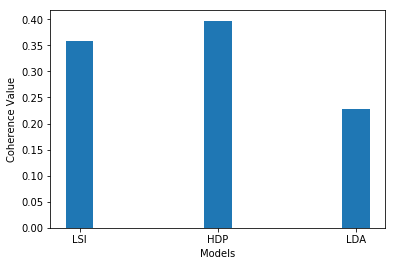

In [124]:
evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence],
                   ['LSI', 'HDP', 'LDA'])

In [125]:
c_v = []
limit = 10
for num_topics in range(1, limit):
    lm = LdaModel(corpus=corpus, num_topics=num_topics,id2word=dictionary)
    cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary,coherence='c_v')
    c_v.append(cm.get_coherence())

2018-12-10 16:14:38,192 : INFO : using symmetric alpha at 1.0
2018-12-10 16:14:38,203 : INFO : using symmetric eta at 1.0
2018-12-10 16:14:38,213 : INFO : using serial LDA version on this node
2018-12-10 16:14:38,224 : INFO : running online (single-pass) LDA training, 1 topics, 1 passes over the supplied corpus of 299 documents, updating model once every 299 documents, evaluating perplexity every 299 documents, iterating 50x with a convergence threshold of 0.001000
2018-12-10 16:14:38,225 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2018-12-10 16:14:38,632 : INFO : -8.935 per-word bound, 489.4 perplexity estimate based on a held-out corpus of 299 documents with 30718 words
2018-12-10 16:14:38,634 : INFO : PROGRESS: pass 0, at document #299/299
2018-12-10 16:14:38,752 : INFO : topic #0 (1.000): 0.016*"the" + 0.011*"-PRON-" + 0.004*"australian" + 0.004*"australia" + 0.004*"people" + 0.004*"government"

2018-12-10 16:14:45,046 : INFO : using symmetric alpha at 0.2
2018-12-10 16:14:45,070 : INFO : using symmetric eta at 0.2
2018-12-10 16:14:45,081 : INFO : using serial LDA version on this node
2018-12-10 16:14:45,104 : INFO : running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 299 documents, updating model once every 299 documents, evaluating perplexity every 299 documents, iterating 50x with a convergence threshold of 0.001000
2018-12-10 16:14:45,113 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2018-12-10 16:14:45,770 : INFO : -9.814 per-word bound, 900.1 perplexity estimate based on a held-out corpus of 299 documents with 30718 words
2018-12-10 16:14:45,795 : INFO : PROGRESS: pass 0, at document #299/299
2018-12-10 16:14:46,108 : INFO : topic #0 (0.200): 0.017*"the" + 0.016*"-PRON-" + 0.005*"australia" + 0.005*"australian" + 0.004*"year" + 0.004*"day" + 0.004*

2018-12-10 16:14:49,809 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2018-12-10 16:14:50,243 : INFO : -10.681 per-word bound, 1641.3 perplexity estimate based on a held-out corpus of 299 documents with 30718 words
2018-12-10 16:14:50,244 : INFO : PROGRESS: pass 0, at document #299/299
2018-12-10 16:14:50,532 : INFO : topic #5 (0.125): 0.020*"the" + 0.011*"-PRON-" + 0.006*"australia" + 0.005*"australian" + 0.004*"us" + 0.004*"people" + 0.004*"day" + 0.004*"government" + 0.003*"good" + 0.003*"afghanistan"
2018-12-10 16:14:50,534 : INFO : topic #1 (0.125): 0.014*"the" + 0.011*"-PRON-" + 0.005*"day" + 0.004*"people" + 0.004*"fire" + 0.003*"australian" + 0.003*"palestinian" + 0.003*"year" + 0.003*"israeli" + 0.003*"a"
2018-12-10 16:14:50,538 : INFO : topic #4 (0.125): 0.013*"the" + 0.009*"-PRON-" + 0.004*"us" + 0.004*"year" + 0.004*"government" + 0.004*"call" + 0.004*"people" + 0.003*"day" + 0.003*"month

In [126]:
c_v

[0.2156966307588212,
 0.22512865214341005,
 0.2544241501387238,
 0.19167101100120026,
 0.21521355264748238,
 0.23113206355086066,
 0.21016891624915415,
 0.21480719783724123,
 0.2488837606296479]

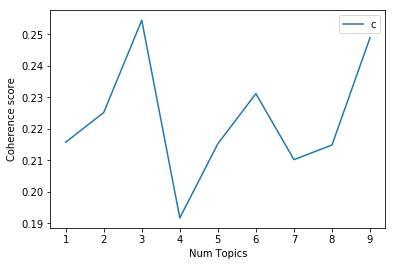

In [127]:
x = range(1, limit)
plt.plot(x, c_v)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [131]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

In [132]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.015309 -0.013708       1        1  16.705997
7     -0.011459  0.006584       2        1  13.931211
0     -0.030698  0.011369       3        1  12.172755
6     -0.029383 -0.048057       4        1  11.378810
8     -0.009125  0.020033       5        1  10.227584
9      0.005224  0.032863       6        1  10.218812
1      0.022482  0.036124       7        1  10.182362
3      0.070898 -0.034878       8        1   6.276653
2      0.009820  0.015524       9        1   5.809732
4     -0.012449 -0.025855      10        1   3.096082, topic_info=     Category        Freq         Term       Total  loglift  logprob
term                                                                
102   Default  493.000000          the  493.000000  30.0000  30.0000
234   Default  109.000000   government  109.000000  29.0000  29.0000
209   Default  342.000000       -PRON-  342.000000  28.0000  28.0000
866   Default   78.000000  palestinian   78.000000  27.0000  27.0000
483   Default   78.000000           us   78.000000  26.0000  26.0000
855   Default   80.000000      israeli   80.000000  25.0000  25.0000
82    Default  111.000000       people  111.000000  24.0000  24.0000
326   Default  113.000000    australia  113.000000  23.0000  23.0000
2354  Default   30.000000       qantas   30.000000  22.0000  22.0000
2319  Default   59.000000      company   59.000000  21.0000  21.0000
117   Default   98.000000         year   98.000000  20.0000  20.0000
184   Default   25.000000        troop   25.000000  19.0000  19.0000
41    Default   67.000000         fire   67.000000  18.0000  18.0000
2125  Default   13.000000         cost   13.000000  17.0000  17.0000
883   Default  129.000000   australian  129.000000  16.0000  16.0000
3510  Default   12.000000        space   12.000000  15.0000  15.0000
2173  Default   61.000000       arafat   61.000000  14.0000  14.0000
319   Default   67.000000  afghanistan   67.000000  13.0000  13.0000
947   Default   43.000000         cent   43.000000  12.0000  12.0000
939   Default   42.000000         test   42.000000  11.0000  11.0000
273   Default   69.000000         tell   69.000000  10.0000  10.0000
907   Default   69.000000       report   69.000000   9.0000   9.0000
1319  Default   19.000000         rate   19.000000   8.0000   8.0000
1306  Default    5.000000       farmer    5.000000   7.0000   7.0000
686   Default   66.000000         kill   66.000000   6.0000   6.0000
1300  Default   36.000000       centre   36.000000   5.0000   5.0000
1633  Default   18.000000       wicket   18.000000   4.0000   4.0000
2054  Default    8.000000      project    8.000000   3.0000   3.0000
2067  Default   43.000000        child   43.000000   2.0000   2.0000
693   Default   74.000000     official   74.000000   1.0000   1.0000
...       ...         ...          ...         ...      ...      ...
234   Topic10    6.671933   government  109.613792   0.6760  -4.9597
483   Topic10    5.328260           us   78.109215   0.7899  -5.1845
866   Topic10    5.299702  palestinian   78.513344   0.7794  -5.1899
666   Topic10    2.360240     building   23.113867   1.1934  -5.9988
4151  Topic10    0.747401     taxpayer    3.690465   1.8781  -7.1487
82    Topic10    5.466192       people  111.102798   0.4632  -5.1590
334   Topic10    2.018857     detainee   21.646313   1.1027  -6.1550
1471  Topic10    1.719552      defence   17.237677   1.1700  -6.3155
41    Topic10    3.553829         fire   67.025284   0.5380  -5.5895
102   Topic10   10.166037          the  493.259583  -0.4070  -4.5385
2126  Topic10    1.960963      economy   22.456299   1.0369  -6.1841
209   Topic10    8.086125       -PRON-  342.584839  -0.2713  -4.7674
1300  Topic10    2.471586       centre   36.367920   0.7862  -5.9527
686   Topic10    3.262807         kill   66.672272   0.4578  -5.6750
319   Topic10    3.274228  afghanistan   67.999588   0.4416  -5.67